In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
연령 = pd.read_excel('./data/ages.xlsx')
연령[:10]

,연령
0,30
1,15
2,15
3,15
4,29
5,30
6,17
7,15
8,27
9,16


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92589dc048>]],
      dtype=object)

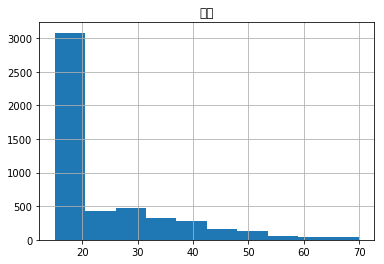

In [4]:
연령.hist()

In [10]:
연령대구간 = [15, 20, 25, 30, 35, 45, 50, 55]

In [11]:
연령대도수 = pd.cut(연령, 연령대구간, right=False)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

## 평균

In [12]:
연령.mean()

연령    22.9032
dtype: float64

In [14]:
연령[연령 < 45].mean()

연령    20.625457
dtype: float64

## 중앙값

In [15]:
연령.median()

연령    15.0
dtype: float64

In [16]:
수영강습생 = pd.read_excel('./data/swim_class.xlsx')

In [17]:
수영강습생.mean()

나이    17.0
dtype: float64

In [18]:
수영강습생.median()

나이    17.0
dtype: float64

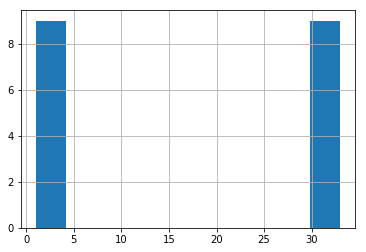

In [21]:
수영강습생['나이'].hist()

## 자료의 개수가 짝수일 경우, 중앙값은 가운데 2개의 값의 평균으로 구해지기 때문

## 최빈값

In [22]:
수영강습생.mode()

,나이,성별
0,2,여자
1,32,NaN


## 

In [24]:
연봉 = pd.read_excel('./data/salary.xlsx')
연봉[:20]

,연봉
0,1500.000000
1,2004.995381
2,3949.137327
3,4221.651047
4,1573.620050
5,3152.702054
6,1500.000000
7,2380.399374
8,2614.572624
9,2478.832797


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f925895eb00>]],
      dtype=object)

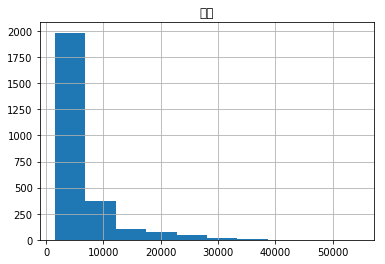

In [25]:
연봉.hist()

In [26]:
연봉.mean()

연봉    5513.759071
dtype: float64

In [27]:
연봉.median()

연봉    3585.611774
dtype: float64

In [28]:
연봉.mode()

,연봉
0,1500.0


In [29]:
연봉.min()

연봉    1500.0
dtype: float64

In [30]:
연봉.max()

연봉    54640.206133
dtype: float64

### 연봉 15% 인상할때

In [31]:
연봉1안 = 연봉 * 1.15

In [32]:
연봉1안.mean()

연봉    6340.822932
dtype: float64

In [33]:
연봉1안.median()

연봉    4123.453541
dtype: float64

In [34]:
연봉1안.mode()

,연봉
0,1725.0


### 연봉 1000만원 인상할때

In [35]:
연봉2안 = 연봉 + 1000

In [37]:
연봉2안.mean()

연봉    6513.759071
dtype: float64

In [38]:
연봉2안.median()

연봉    4585.611774
dtype: float64

In [39]:
연봉2안.mode()

,연봉
0,2500.0


## 자료의 분포도

In [47]:
게임당점수 = pd.read_excel('./data/player_stats.xlsx')
게임당점수

,이성주,김성주,장성주
0,7.0,7.0,3
1,8.0,9.0,3
2,9.0,9.0,6
3,9.0,10.0,7
4,10.0,10.0,7
5,10.0,10.0,10
6,11.0,10.0,10
7,11.0,11.0,10
8,12.0,11.0,11
9,13.0,13.0,13


In [48]:
게임당점수.mean()

이성주    10.0
김성주    10.0
장성주    10.0
dtype: float64

In [49]:
게임당점수.median()

이성주    10.0
김성주    10.0
장성주    10.0
dtype: float64

In [50]:
def 범위구하기(시리즈):
    return 시리즈.max() - 시리즈.min()

In [51]:
게임당점수.apply(범위구하기)

이성주     6.0
김성주     6.0
장성주    27.0
dtype: float64

In [52]:
게임당점수.loc[10, '이성주'] = 50
게임당점수

,이성주,김성주,장성주
0,7.0,7.0,3
1,8.0,9.0,3
2,9.0,9.0,6
3,9.0,10.0,7
4,10.0,10.0,7
5,10.0,10.0,10
6,11.0,10.0,10
7,11.0,11.0,10
8,12.0,11.0,11
9,13.0,13.0,13


In [53]:
게임당점수.apply(범위구하기)

이성주    43.0
김성주     6.0
장성주    27.0
dtype: float64

## 사분범위

In [54]:
사분위수 = pd.qcut(게임당점수['이성주'], 4).value_counts().sort_index()
사분위수

(6.999, 9.0]    4
(9.0, 10.0]     2
(10.0, 11.5]    2
(11.5, 50.0]    3
Name: 이성주, dtype: int64

In [55]:
사분범위 = 사분위수.index[1:-1]
사분범위

CategoricalIndex([(9.0, 10.0], (10.0, 11.5]], categories=[(6.999, 9.0], (9.0, 10.0], (10.0, 11.5], (11.5, 50.0]], ordered=True, dtype='category')

In [57]:
범위여부 = pd.qcut(게임당점수['이성주'], 4).isin(사분범위)
범위여부

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8     False
9     False
10    False
Name: 이성주, dtype: bool

In [58]:
사분범위내점수 = 게임당점수['이성주'][범위여부]
사분범위내점수

4    10.0
5    10.0
6    11.0
7    11.0
Name: 이성주, dtype: float64

In [59]:
사분범위내점수.mean()

10.5

In [60]:
사분범위내점수.median()

10.5

In [62]:
범위구하기(사분범위내점수)

1.0

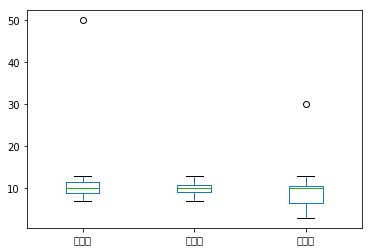

In [63]:
게임당점수.plot(kind='box')

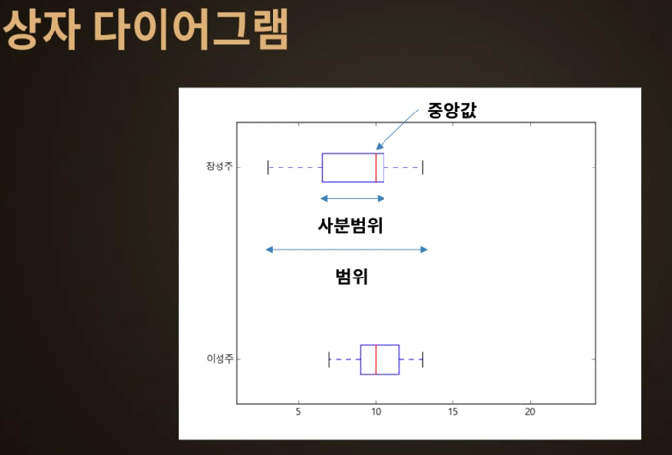

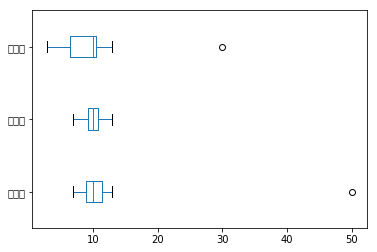

In [65]:
게임당점수.plot(kind='box', vert=False)

## 백분위수

In [66]:
연봉 = pd.read_excel('./data/salary.xlsx')
연봉[:10]

,연봉
0,1500.000000
1,2004.995381
2,3949.137327
3,4221.651047
4,1573.620050
5,3152.702054
6,1500.000000
7,2380.399374
8,2614.572624
9,2478.832797


In [67]:
연봉.quantile(0.9) # 상위 10%

연봉    11591.192194
Name: 0.9, dtype: float64

In [69]:
연봉.quantile(0.5) # 상위 50%

연봉    3585.611774
Name: 0.5, dtype: float64

In [71]:
사분하한 = 연봉.quantile(0.25)
사분하한

연봉    2310.653026
Name: 0.25, dtype: float64

In [72]:
사분상한 = 연봉.quantile(0.75)
사분상한

연봉    5924.477478
Name: 0.75, dtype: float64

In [75]:
연봉_사분범위 = 연봉[(연봉 > 사분하한) & (연봉 < 사분상한)].dropna()
연봉_사분범위[:10]

,연봉
2,3949.137327
3,4221.651047
5,3152.702054
7,2380.399374
8,2614.572624
9,2478.832797
10,3742.348914
12,3543.834478
14,4114.338390
15,3797.001664


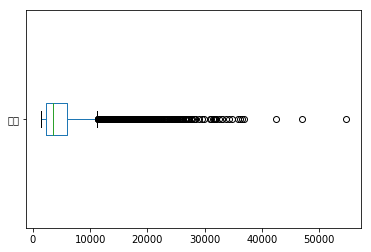

In [76]:
연봉.plot(kind='box', vert=False)

## 분산, 표준편차
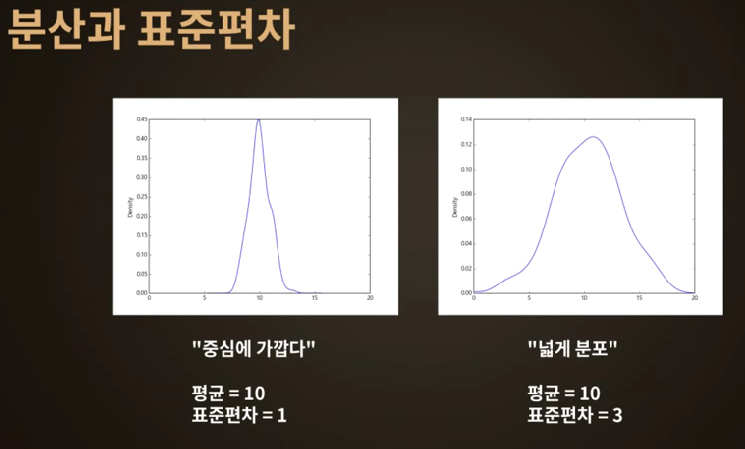

In [77]:
게임당점수.var()

이성주    148.454545
김성주      2.444444
장성주     54.200000
dtype: float64

In [78]:
게임당점수.std()

이성주    12.184192
김성주     1.563472
장성주     7.362065
dtype: float64

In [79]:
게임당점수.std().sort_values()

김성주     1.563472
장성주     7.362065
이성주    12.184192
dtype: float64

In [80]:
(게임당점수 + 2).std()

이성주    12.184192
김성주     1.563472
장성주     7.362065
dtype: float64